In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [2]:
from analysis_support import *

# Halton Sequence, $A^*$, single-edge ${\cal V}_k$ cuts

In [3]:
file_pattern = 'halton.a_star.single_edge/lazy_prm_bc.BARN.instance_*.json'
# Halton results loading
vanilla_results = collect_deterministic_results(file_pattern)
table = tabulate_deterministic_results(vanilla_results)

Found 1488 result files
Missing results: 0


In [4]:
table

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_200,1,0,1,42,378,3,5.599238,0.002571,0.153317,2,True,11.325299,11.325299,11.389282,11.389282,6
1,BARN,instance_206,567,0,0,32,269,2,5.550095,0.000175,0.192394,1,True,10.743326,10.743326,10.930761,10.930761,4
2,BARN,instance_212,1,0,1,42,467,3,8.389869,0.000460,0.154319,2,True,10.145640,10.145640,10.163610,10.163610,5
3,BARN,instance_277,1337,0,5,82,1508,7,5.622160,0.077365,0.189216,6,True,10.019279,10.019279,10.000132,10.000132,8
4,BARN,instance_163,42,0,1,42,487,3,3.539201,0.000542,0.109756,2,True,10.116908,10.116908,10.076960,10.076960,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,BARN,instance_158,1337,0,1,42,437,3,9.173819,0.000398,0.149459,2,True,9.988743,9.988743,9.993364,9.993364,5
1484,BARN,instance_227,1,0,0,32,276,2,3.700152,0.000156,0.100035,1,True,12.208927,12.208927,12.339231,12.339231,6
1485,BARN,instance_237,1,0,0,32,297,2,6.332786,0.000120,0.113809,1,True,10.743326,10.743326,10.930761,10.930761,4
1486,BARN,instance_137,42,0,0,32,245,2,5.550095,0.000136,0.129362,1,True,11.474006,11.474006,11.468859,11.468859,5


## Analysis

### Halton Sequence Sampling

In [5]:
multiple_iterations = table[table['iterations']>1]
multiple_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_200,1,0,1,42,378,3,5.599238,0.002571,0.153317,2,True,11.325299,11.325299,11.389282,11.389282,6
2,BARN,instance_212,1,0,1,42,467,3,8.389869,0.000460,0.154319,2,True,10.145640,10.145640,10.163610,10.163610,5
3,BARN,instance_277,1337,0,5,82,1508,7,5.622160,0.077365,0.189216,6,True,10.019279,10.019279,10.000132,10.000132,8
4,BARN,instance_163,42,0,1,42,487,3,3.539201,0.000542,0.109756,2,True,10.116908,10.116908,10.076960,10.076960,7
5,BARN,instance_049,567,1,0,42,454,3,3.239333,0.000499,0.215448,2,True,10.485296,10.114680,10.500064,10.161090,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,BARN,instance_258,1,1,0,42,401,3,3.239333,0.000435,0.258159,2,True,12.062175,10.363609,12.291561,10.395590,5
1481,BARN,instance_059,1337,2,0,52,707,4,4.502446,0.001718,0.342047,3,True,10.456946,9.804552,10.425438,9.742584,6
1482,BARN,instance_294,1,0,1,42,417,3,5.958018,0.000521,0.092243,2,True,10.386482,10.386482,10.578222,10.578222,5
1483,BARN,instance_158,1337,0,1,42,437,3,9.173819,0.000398,0.149459,2,True,9.988743,9.988743,9.993364,9.993364,5


In [6]:
single_iterations = table[table['iterations']==1]
single_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
1,BARN,instance_206,567,0,0,32,269,2,5.550095,0.000175,0.192394,1,True,10.743326,10.743326,10.930761,10.930761,4
6,BARN,instance_012,567,0,0,32,301,2,5.150895,0.000145,0.123328,1,True,12.566364,12.566364,12.860110,12.860110,5
9,BARN,instance_229,1337,0,0,32,250,2,5.550095,0.000133,0.108736,1,True,11.474006,11.474006,11.468859,11.468859,5
12,BARN,instance_041,1,0,0,32,347,2,5.150895,0.000142,0.044662,1,True,11.474006,11.474006,11.468859,11.468859,5
13,BARN,instance_060,42,0,0,32,349,2,5.150895,0.000143,0.070753,1,True,10.440148,10.440148,10.420827,10.420827,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,BARN,instance_104,42,0,0,32,331,2,5.150895,0.000126,0.141248,1,True,10.440148,10.440148,10.420827,10.420827,5
1480,BARN,instance_012,1337,0,0,32,301,2,5.150895,0.000134,0.114948,1,True,12.566364,12.566364,12.860110,12.860110,5
1484,BARN,instance_227,1,0,0,32,276,2,3.700152,0.000156,0.100035,1,True,12.208927,12.208927,12.339231,12.339231,6
1485,BARN,instance_237,1,0,0,32,297,2,6.332786,0.000120,0.113809,1,True,10.743326,10.743326,10.930761,10.930761,4


In [7]:
multiple_iterations['iterations'].describe()

count    918.000000
mean       3.162309
std        1.747039
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       19.000000
Name: iterations, dtype: float64

In [8]:
multiple_iterations[['instance', 'seed', 'iterations']].sort_values('iterations', ascending=False).head(20)[['instance', 'seed', 'iterations']]

,instance,seed,iterations
924,instance_120,567,19
718,instance_069,1337,17
73,instance_121,42,12
1220,instance_186,1,11
53,instance_121,567,11
1226,instance_188,42,10
808,instance_188,1337,10
774,instance_188,1,10
796,instance_181,42,9
1296,instance_064,1337,9


In [9]:
multiple_expansions = multiple_iterations.query('rgg_expansions > 1')
multiple_expansions[['instance', 'seed', 'rgg_expansions', 'rgg_expansions', 'rgg_V', 'rgg_E', 'rgg_dispersion']]

,instance,seed,rgg_expansions,rgg_expansions,rgg_V,rgg_E,rgg_dispersion
0,instance_200,1,3,3,42,378,5.599238
2,instance_212,1,3,3,42,467,8.389869
3,instance_277,1337,7,7,82,1508,5.622160
4,instance_163,42,3,3,42,487,3.539201
5,instance_049,567,3,3,42,454,3.239333
...,...,...,...,...,...,...,...
1479,instance_258,1,3,3,42,401,3.239333
1481,instance_059,1337,4,4,52,707,4.502446
1482,instance_294,1,3,3,42,417,5.958018
1483,instance_158,1337,3,3,42,437,9.173819


In [10]:
multiple_expansions['rgg_V'].describe()

count    918.000000
mean      53.623094
std       17.470386
min       42.000000
25%       42.000000
50%       42.000000
75%       62.000000
max      212.000000
Name: rgg_V, dtype: float64

In [11]:
multiple_expansions['rgg_E'].describe()

count     918.000000
mean      721.344227
std       463.235385
min       309.000000
25%       459.000000
50%       578.000000
75%       821.000000
max      7327.000000
Name: rgg_E, dtype: float64

In [12]:
collision_set = multiple_iterations.query('num_no_goods > 1')
collision_set[['instance', 'seed', 'num_no_goods']]

,instance,seed,num_no_goods
31,instance_264,1,2
32,instance_261,8193,2
38,instance_118,1337,2
41,instance_275,42,2
48,instance_036,8193,2
...,...,...,...
1434,instance_217,42,2
1444,instance_017,1,4
1467,instance_239,1337,3
1477,instance_223,42,4


In [13]:
curvature_set = multiple_iterations.query('num_cusp_no_goods > 1')
curvature_set[['instance', 'seed', 'num_cusp_no_goods']]

,instance,seed,num_cusp_no_goods
3,instance_277,1337,5
33,instance_198,1,3
34,instance_200,8193,3
37,instance_024,8193,2
38,instance_118,1337,3
...,...,...,...
1460,instance_120,1,3
1463,instance_093,567,2
1464,instance_099,42,2
1465,instance_260,1337,2


In [14]:
time_data = table[['instance', 'seed', 'plan_time', 'verif_time']]
time_data

,instance,seed,plan_time,verif_time
0,instance_200,1,0.002571,0.153317
1,instance_206,567,0.000175,0.192394
2,instance_212,1,0.000460,0.154319
3,instance_277,1337,0.077365,0.189216
4,instance_163,42,0.000542,0.109756
...,...,...,...,...
1483,instance_158,1337,0.000398,0.149459
1484,instance_227,1,0.000156,0.100035
1485,instance_237,1,0.000120,0.113809
1486,instance_137,42,0.000136,0.129362


In [15]:
time_data['plan_time'].describe()

count    1488.000000
mean        0.164509
std         1.229507
min         0.000105
25%         0.000147
50%         0.000486
75%         0.003904
max        26.233139
Name: plan_time, dtype: float64

In [16]:
time_data['verif_time'].describe()

count    1488.000000
mean        0.204607
std         0.139315
min         0.021997
25%         0.110749
50%         0.170314
75%         0.254592
max         1.655859
Name: verif_time, dtype: float64

In [17]:
plan_times = [row['plan_time'] for _, row in time_data.iterrows()]
verif_times = [row['verif_time'] for _, row in time_data.iterrows()]

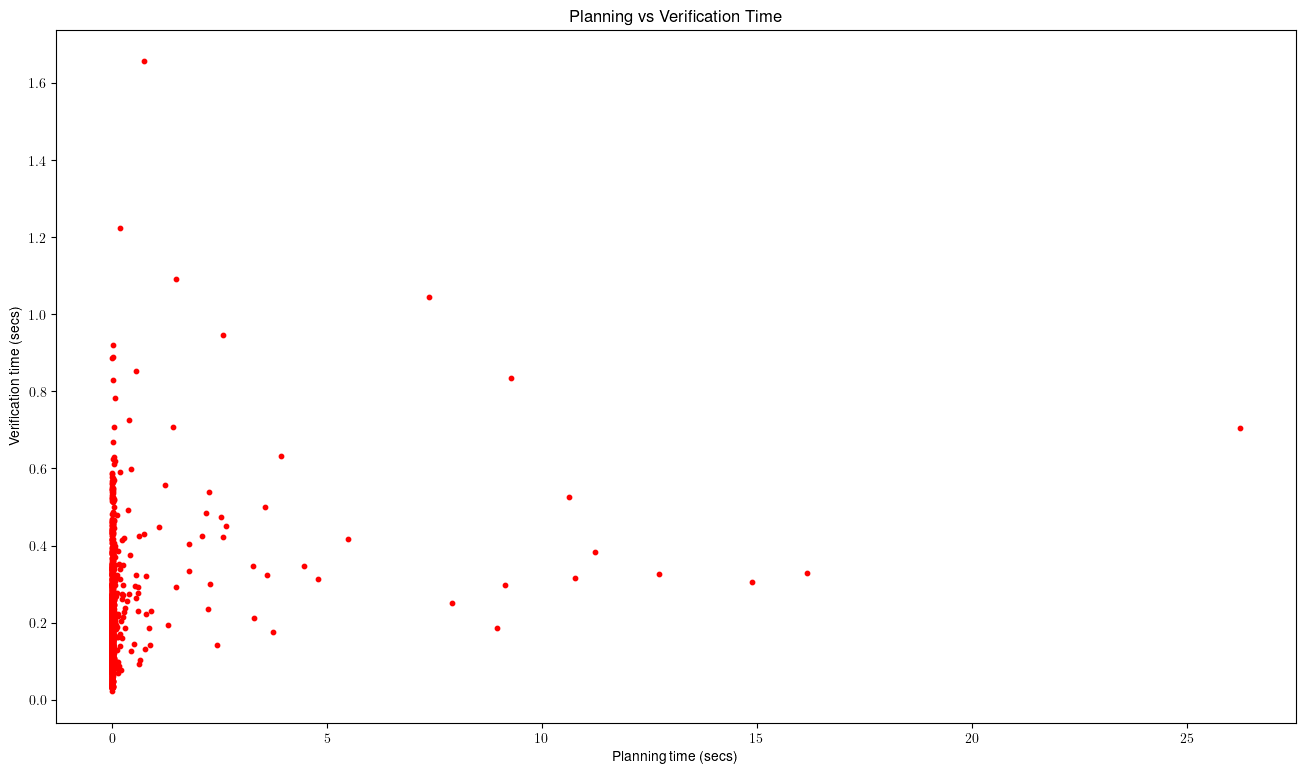

In [18]:
plt.figure(figsize = (16,9))
plt.scatter(plan_times, verif_times, s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Planning vs Verification Time')
plt.xlabel('Planning time (secs)')
plt.ylabel('Verification time (secs)')
plt.show()

In [19]:
plan_verif_ratio = time_data['plan_time'] / time_data['verif_time']

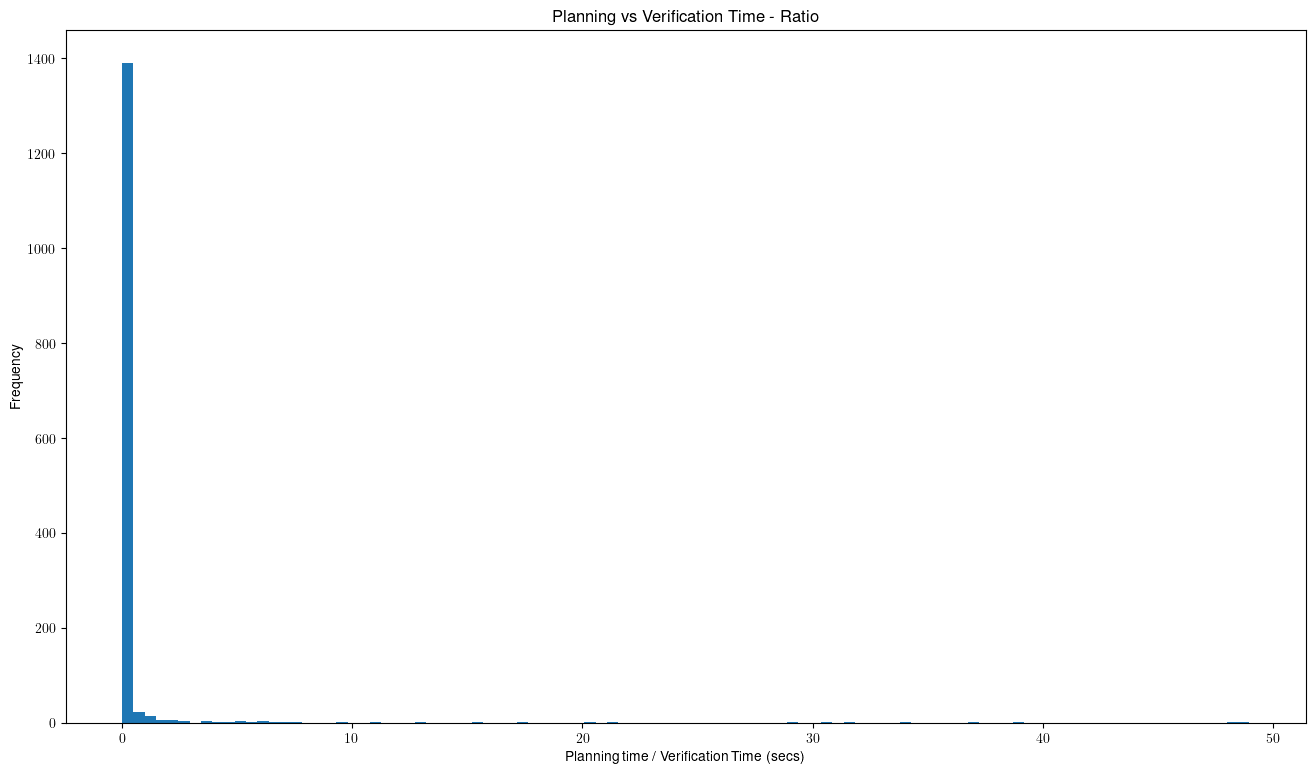

In [20]:
fig, axs = plt.subplots(figsize = (16,9))

axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [21]:
time_data_multiple_iterations = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations > 1')
time_data_single_iteration = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations == 1')

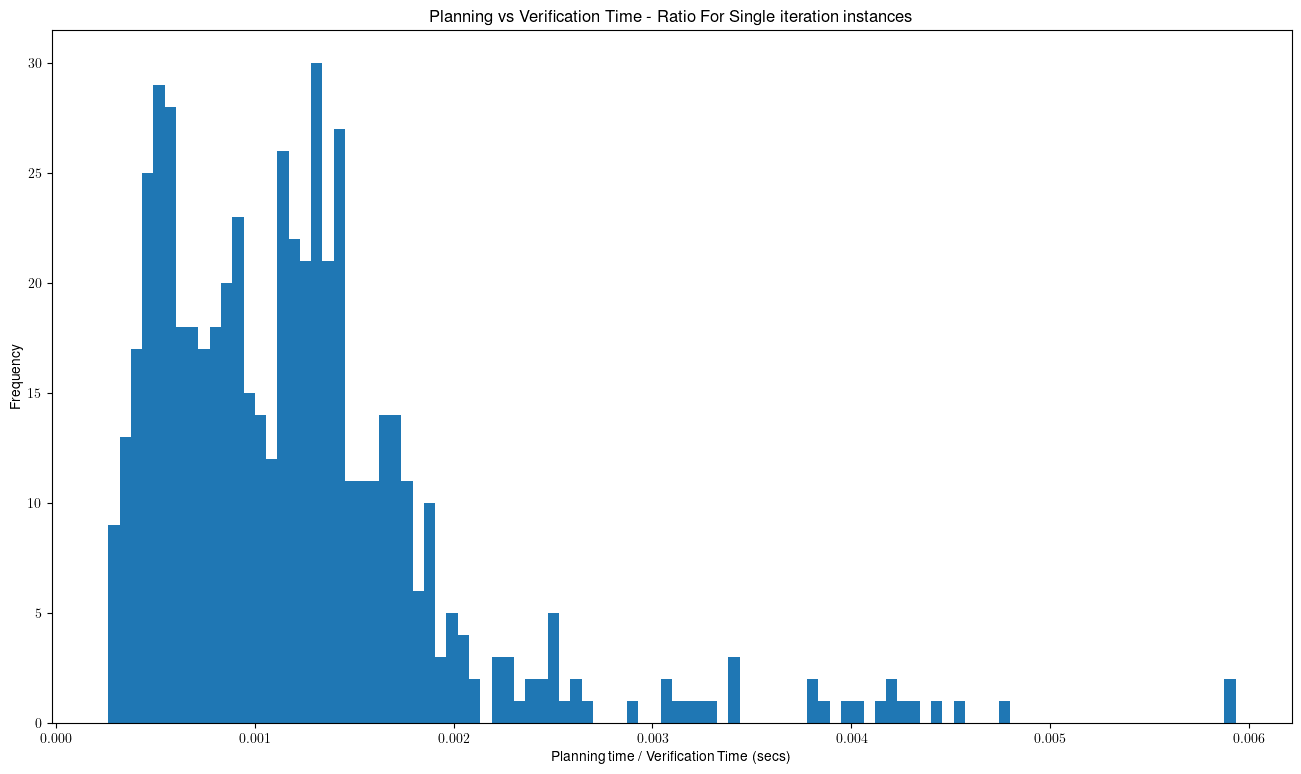

In [22]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_single_iteration['plan_time'] / time_data_single_iteration['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Single iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

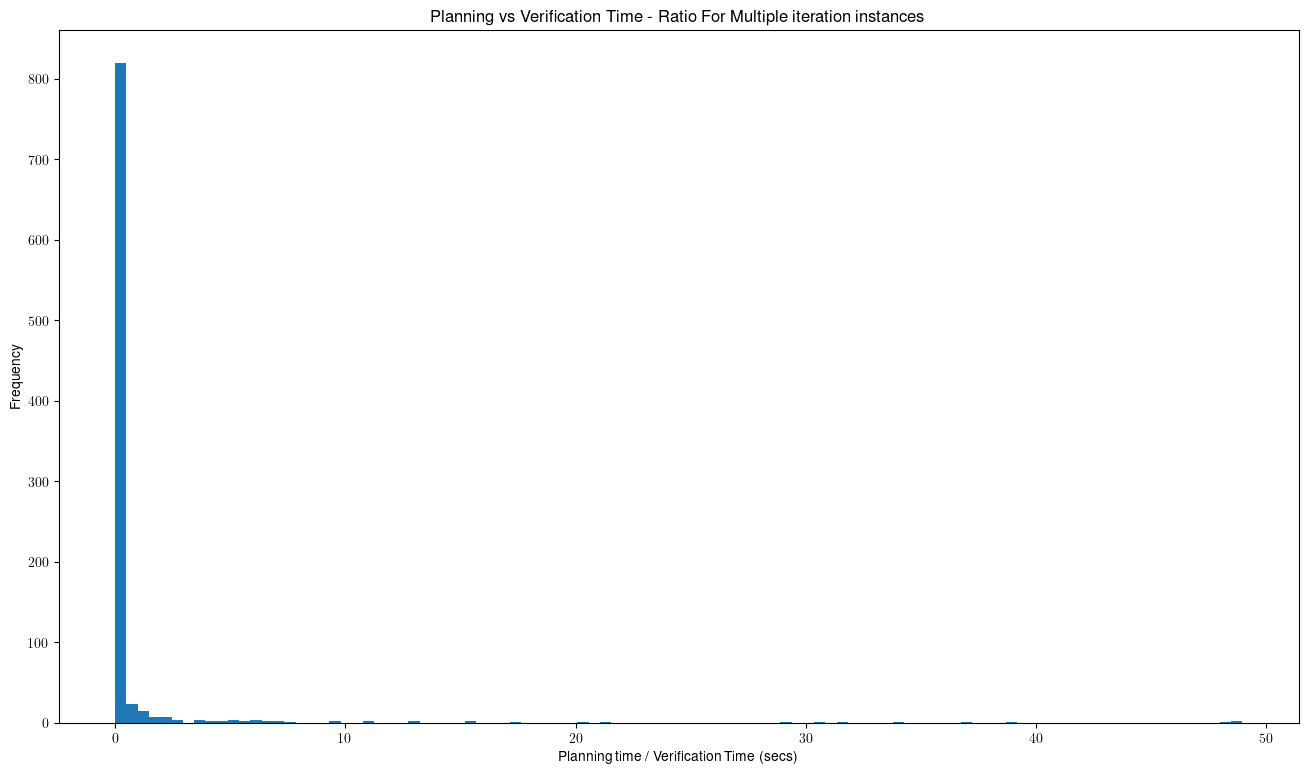

In [23]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_multiple_iterations['plan_time'] / time_data_multiple_iterations['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Multiple iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [24]:
total_time_single_iteration = time_data_single_iteration['plan_time'] + time_data_single_iteration['verif_time']

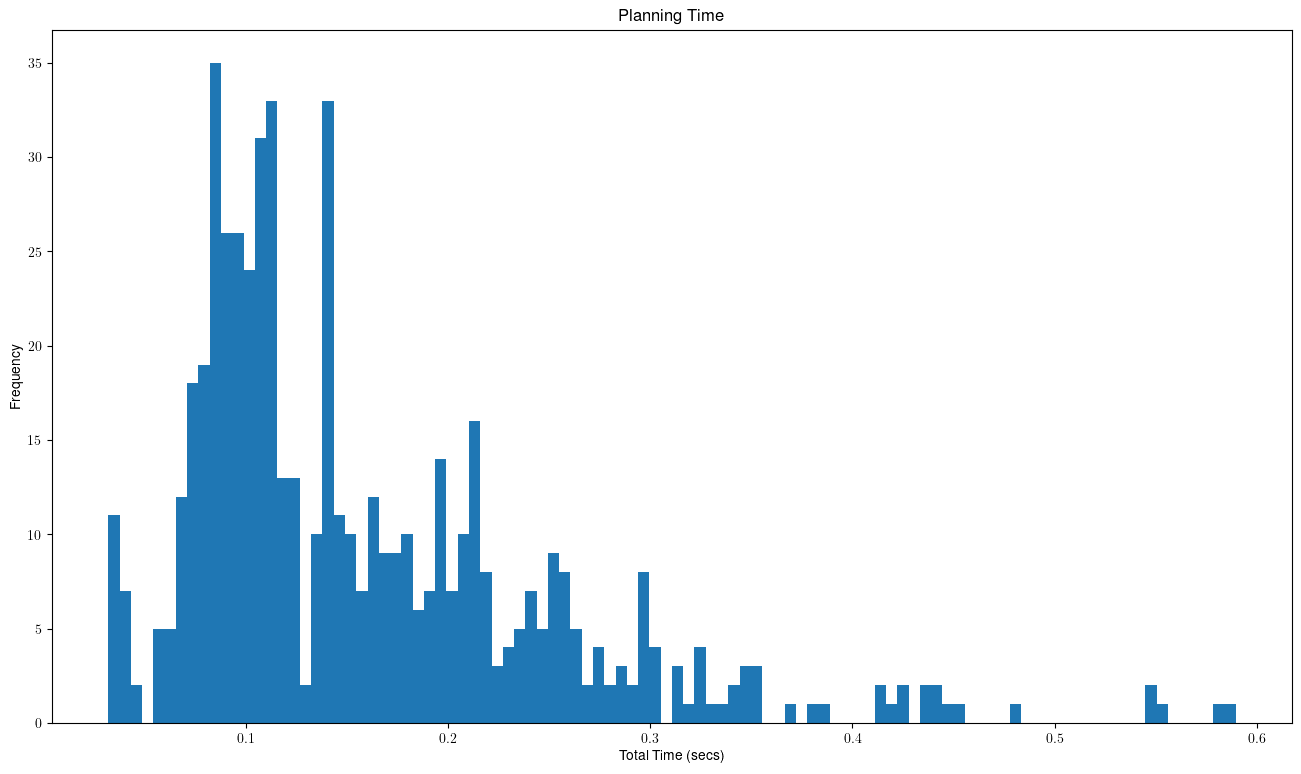

In [25]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_single_iteration, bins=100)

plt.title('Planning Time')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [26]:
total_time_multiple_iterations = time_data_multiple_iterations['plan_time'] + time_data_multiple_iterations['verif_time']

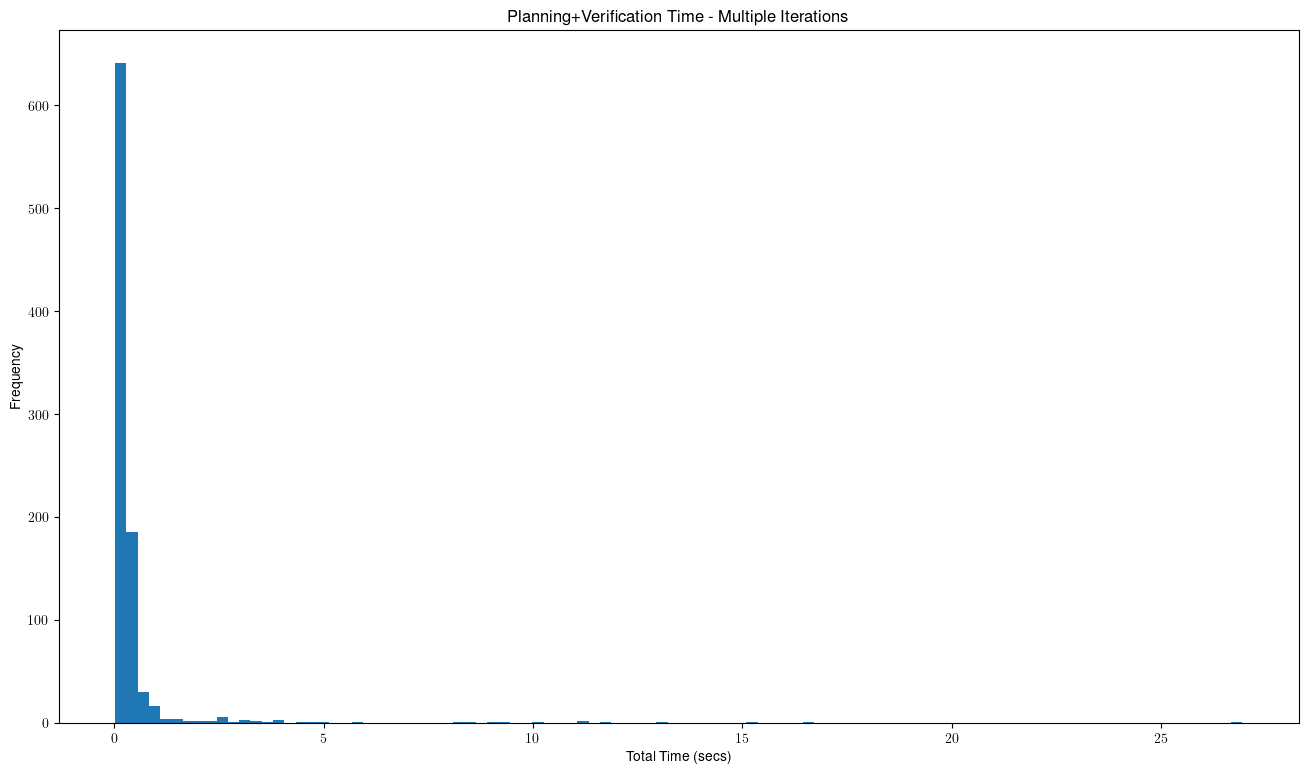

In [27]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_multiple_iterations, bins=100)

plt.title('Planning+Verification Time - Multiple Iterations')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [28]:
table[['holonomic_cost_k']]

,holonomic_cost_k
0,11.325299
1,10.743326
2,10.145640
3,10.019279
4,10.116908
...,...
1483,9.988743
1484,12.208927
1485,10.743326
1486,11.474006


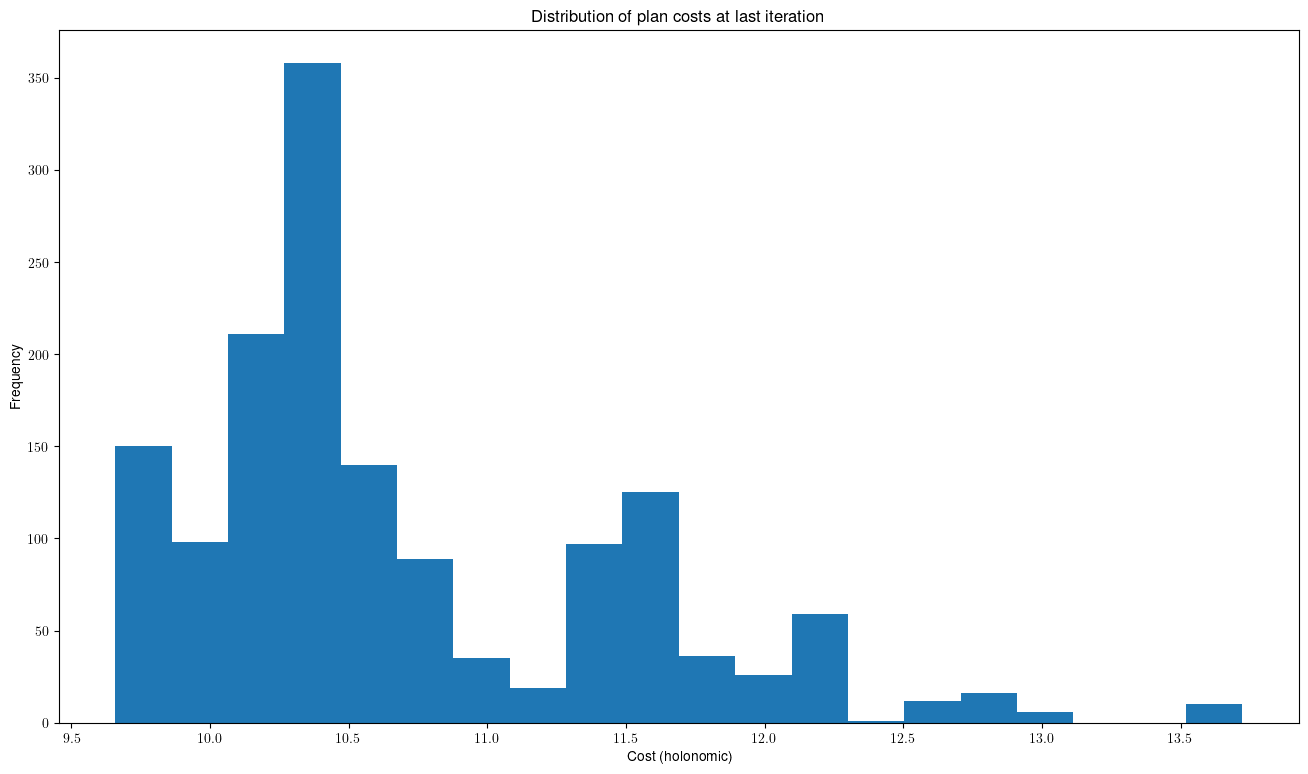

In [29]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(table[['holonomic_cost_k']].to_numpy(), bins=20)

plt.title('Distribution of plan costs at last iteration')
plt.xlabel('Cost (holonomic)')
plt.ylabel('Frequency')
plt.show()

In [30]:
holonomic_cost_diff = multiple_iterations['holonomic_cost_k'] - multiple_iterations['holonomic_cost_0']
holonomic_cost_diff

0       0.000000
2       0.000000
3       0.000000
4       0.000000
5      -0.370616
          ...   
1479   -1.698565
1481   -0.652395
1482    0.000000
1483    0.000000
1487    0.000000
Length: 918, dtype: float64

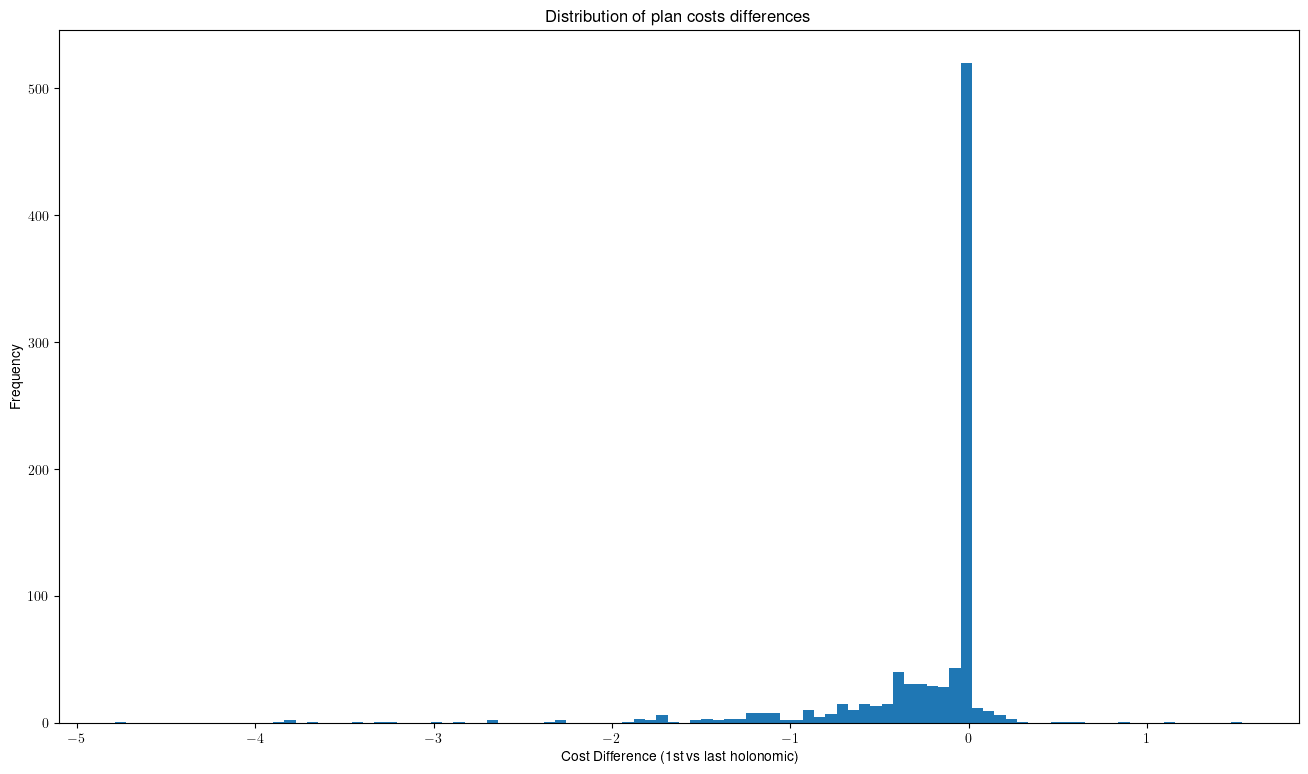

In [31]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(holonomic_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of plan costs differences')
plt.xlabel('Cost Difference (1st vs last holonomic)')
plt.ylabel('Frequency')
plt.show()

In [32]:
smooth_cost_diff = table['smooth_cost_k'] - table['smooth_cost_0']
smooth_cost_diff

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1483    0.0
1484    0.0
1485    0.0
1486    0.0
1487    0.0
Length: 1488, dtype: float64

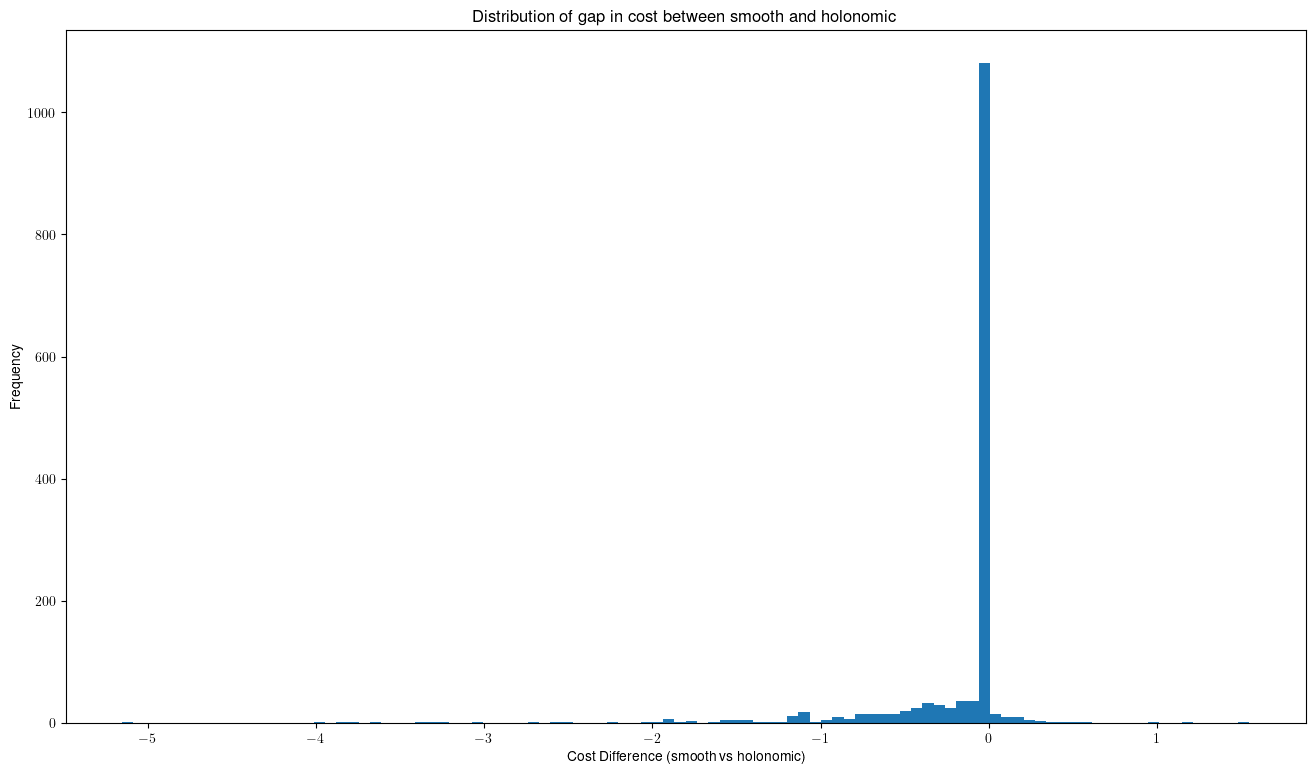

In [33]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(smooth_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of gap in cost between smooth and holonomic')
plt.xlabel('Cost Difference (smooth vs holonomic)')
plt.ylabel('Frequency')
plt.show()

In [34]:
time_vs_plan_len = table[['instance', 'seed', 'plan_time', 'verif_time', 'plan_length']]
time_vs_plan_len

,instance,seed,plan_time,verif_time,plan_length
0,instance_200,1,0.002571,0.153317,6
1,instance_206,567,0.000175,0.192394,4
2,instance_212,1,0.000460,0.154319,5
3,instance_277,1337,0.077365,0.189216,8
4,instance_163,42,0.000542,0.109756,7
...,...,...,...,...,...
1483,instance_158,1337,0.000398,0.149459,5
1484,instance_227,1,0.000156,0.100035,6
1485,instance_237,1,0.000120,0.113809,4
1486,instance_137,42,0.000136,0.129362,5


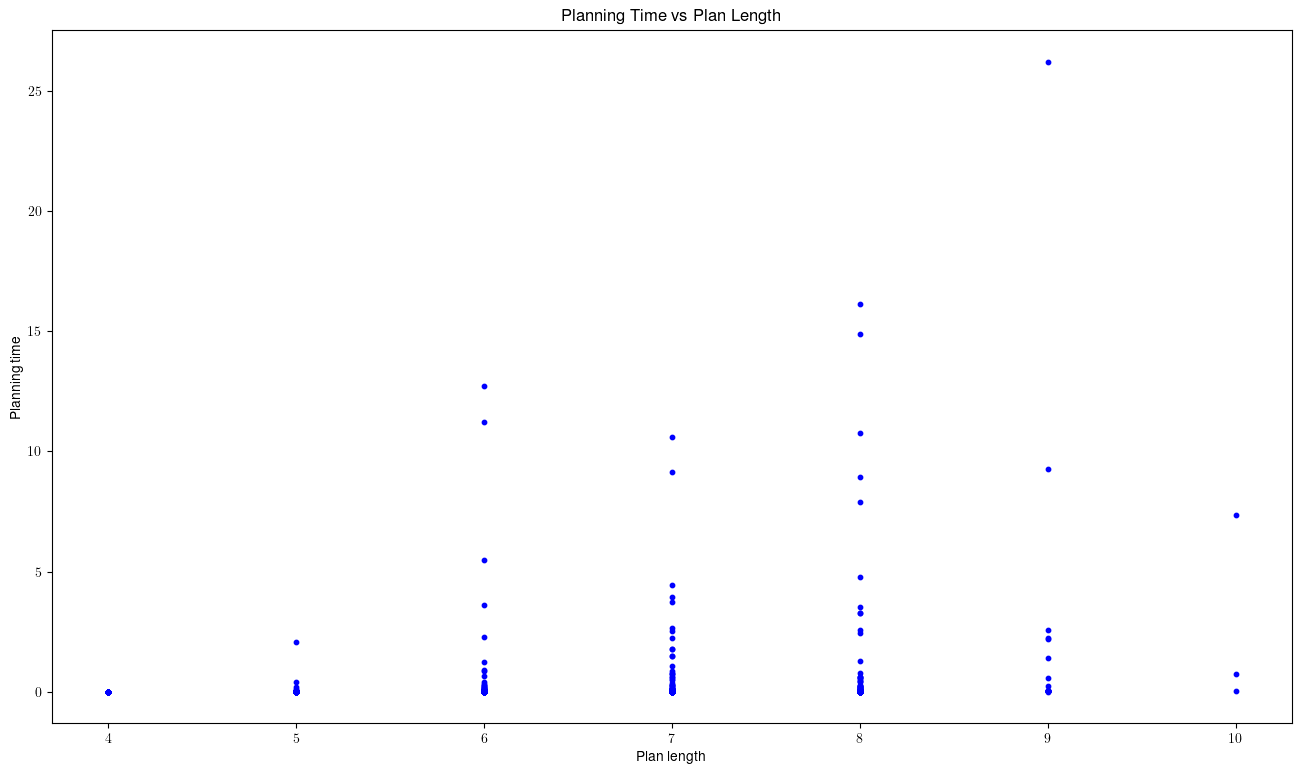

In [35]:
plt.figure(figsize = (16,9))
plan_times = time_vs_plan_len['plan_time'].to_numpy()
plan_length = time_vs_plan_len['plan_length'].to_numpy()
plt.scatter(plan_length, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Plan Length')
plt.xlabel('Plan length')
plt.ylabel('Planning time')
plt.show()

In [36]:
time_vs_no_goods = table[['instance', 'seed', 'plan_time', 'verif_time', 'num_no_goods', 'num_cusp_no_goods']]
time_vs_no_goods

,instance,seed,plan_time,verif_time,num_no_goods,num_cusp_no_goods
0,instance_200,1,0.002571,0.153317,0,1
1,instance_206,567,0.000175,0.192394,0,0
2,instance_212,1,0.000460,0.154319,0,1
3,instance_277,1337,0.077365,0.189216,0,5
4,instance_163,42,0.000542,0.109756,0,1
...,...,...,...,...,...,...
1483,instance_158,1337,0.000398,0.149459,0,1
1484,instance_227,1,0.000156,0.100035,0,0
1485,instance_237,1,0.000120,0.113809,0,0
1486,instance_137,42,0.000136,0.129362,0,0


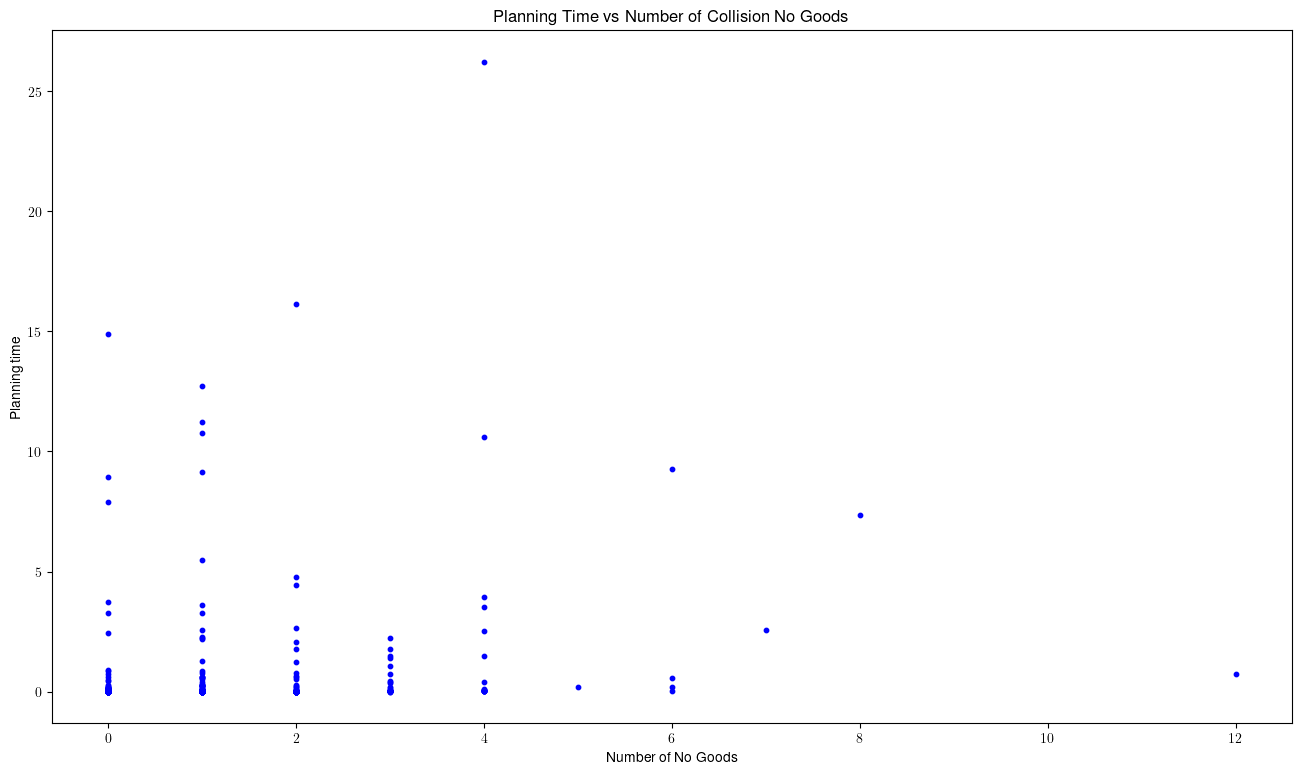

In [37]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Collision No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

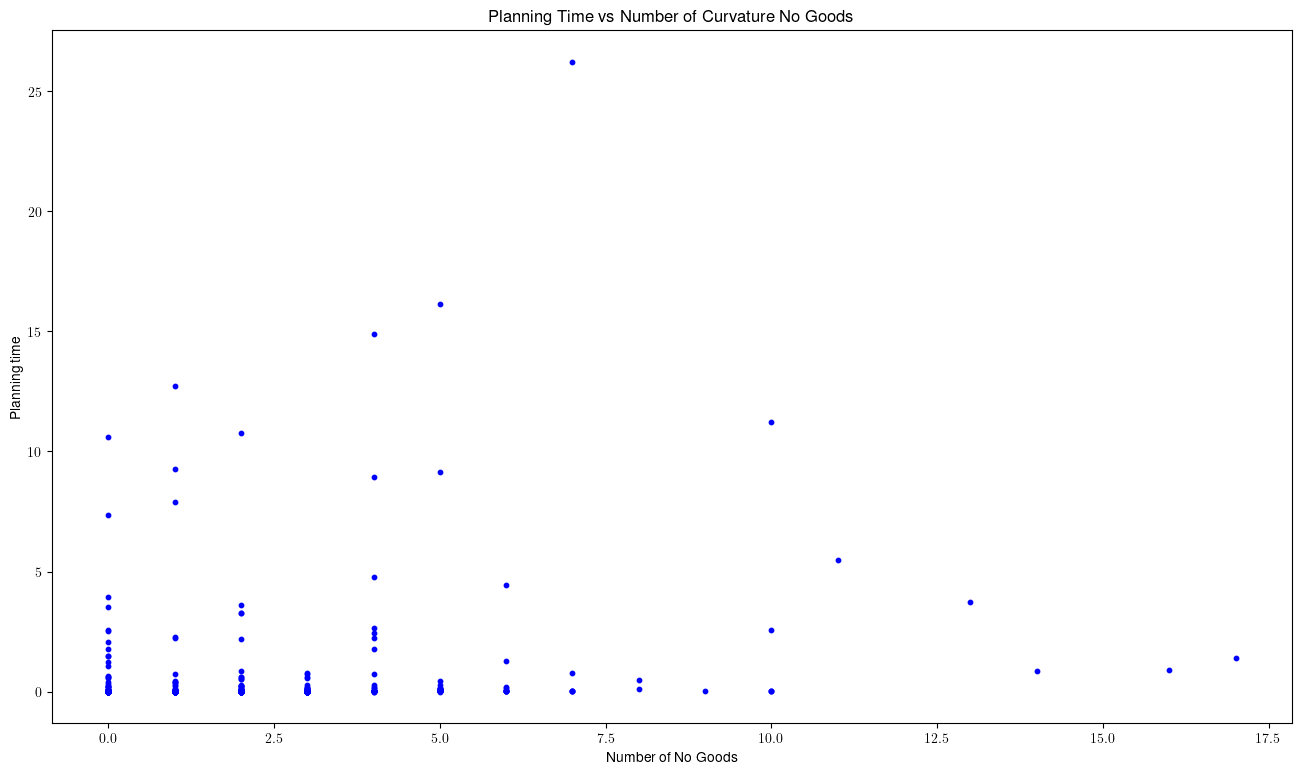

In [38]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_cusp_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

In [39]:
time_breakpoints = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]

In [40]:
coverage_at_breakpoint = np.zeros(len(time_breakpoints), dtype=int)

for i in range(len(plan_times)):
    for j in range(len(time_breakpoints)):
        if plan_times[i] <= time_breakpoints[j]:
            coverage_at_breakpoint[j] += 1
print("[{}]".format(", ".join(str(v) for v in coverage_at_breakpoint)))

[1147, 1218, 1361, 1387, 1431, 1449, 1475, 1481, 1488, 1488, 1488]


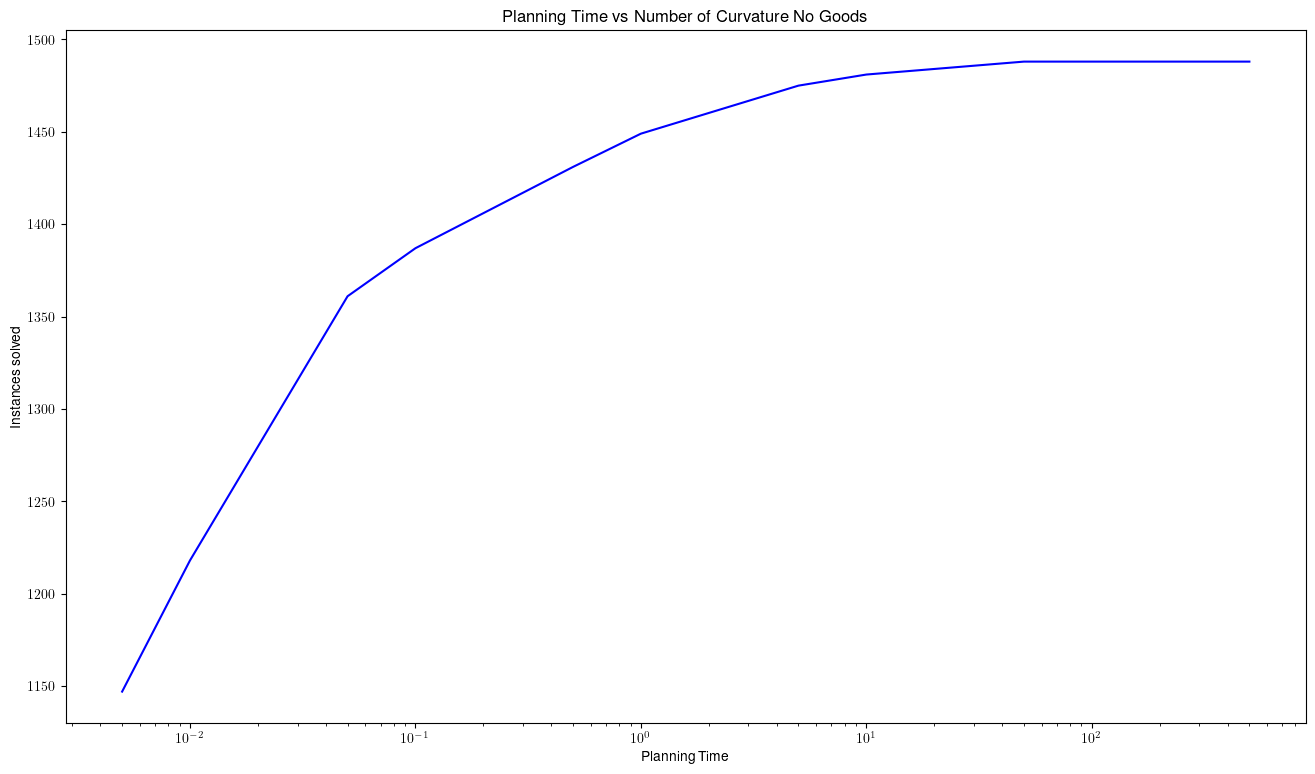

In [41]:
plt.figure(figsize = (16,9))
plt.plot(time_breakpoints, coverage_at_breakpoint, color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Planning Time')
plt.xscale('log')
plt.ylabel('Instances solved')
plt.show()

#### Analysis w.r.t. BARN Metrics

In [42]:
file_pattern = '../BARN/instance*.json'
metadata_BARN = collect_instance_metadata(file_pattern)
metadata_table = tabulate_instance_metadata(metadata_BARN)

Found metadata for 300 instances


In [43]:
total_time_table = table[['instance', 'seed', 'iterations', 'num_no_goods', 'num_cusp_no_goods', 'plan_time', 'verif_time']]

In [44]:
total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']

/tmp/ipykernel_13008/4224517660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']


In [45]:
total_time_table

,instance,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time
0,instance_200,1,2,0,1,0.002571,0.153317,0.155888
1,instance_206,567,1,0,0,0.000175,0.192394,0.192569
2,instance_212,1,2,0,1,0.000460,0.154319,0.154779
3,instance_277,1337,6,0,5,0.077365,0.189216,0.266581
4,instance_163,42,2,0,1,0.000542,0.109756,0.110298
...,...,...,...,...,...,...,...,...
1483,instance_158,1337,2,0,1,0.000398,0.149459,0.149858
1484,instance_227,1,1,0,0,0.000156,0.100035,0.100191
1485,instance_237,1,1,0,0,0.000120,0.113809,0.113929
1486,instance_137,42,1,0,0,0.000136,0.129362,0.129498


In [46]:
metadata_table

,instance,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
0,instance_157,1.765225,4.795159,4.974359,2.196642,1.524747
1,instance_142,3.144283,8.739424,2.687500,8.123383,1.126505
2,instance_040,4.737938,10.563817,2.000000,10.798692,1.077837
3,instance_197,1.937390,5.563366,4.709677,3.306763,1.065729
4,instance_296,1.560408,4.109565,4.342857,1.518347,1.248066
...,...,...,...,...,...,...
295,instance_194,1.235520,3.674314,4.437500,0.928998,1.099499
296,instance_252,3.160814,7.436131,3.225806,5.575897,1.054628
297,instance_271,1.813977,4.232665,4.285714,2.477100,1.183793
298,instance_272,1.359000,4.062666,4.193548,1.254822,1.037314


In [47]:
metadata_cmp = total_time_table.set_index('instance').join(metadata_table.set_index('instance'), on=['instance'])
metadata_cmp

,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
instance,,,,,,,,,,,,
instance_200,1,2,0,1,0.002571,0.153317,0.155888,1.392181,4.418005,4.687500,1.470051,1.131777
instance_206,567,1,0,0,0.000175,0.192394,0.192569,1.438338,4.977141,4.210526,1.272509,1.240162
instance_212,1,2,0,1,0.000460,0.154319,0.154779,3.279886,7.773269,3.290323,7.141281,1.156758
instance_277,1337,6,0,5,0.077365,0.189216,0.266581,2.018655,4.715683,4.903226,2.844638,1.103815
instance_163,42,2,0,1,0.000542,0.109756,0.110298,1.799272,4.052763,5.257143,2.235852,1.237805
...,...,...,...,...,...,...,...,...,...,...,...,...
instance_158,1337,2,0,1,0.000398,0.149459,0.149858,2.038413,4.733077,5.161290,3.159391,1.091156
instance_227,1,1,0,0,0.000156,0.100035,0.100191,1.687327,3.963272,5.419355,2.091633,1.101682
instance_237,1,1,0,0,0.000120,0.113809,0.113929,1.841285,4.590614,4.903226,2.980547,1.082392


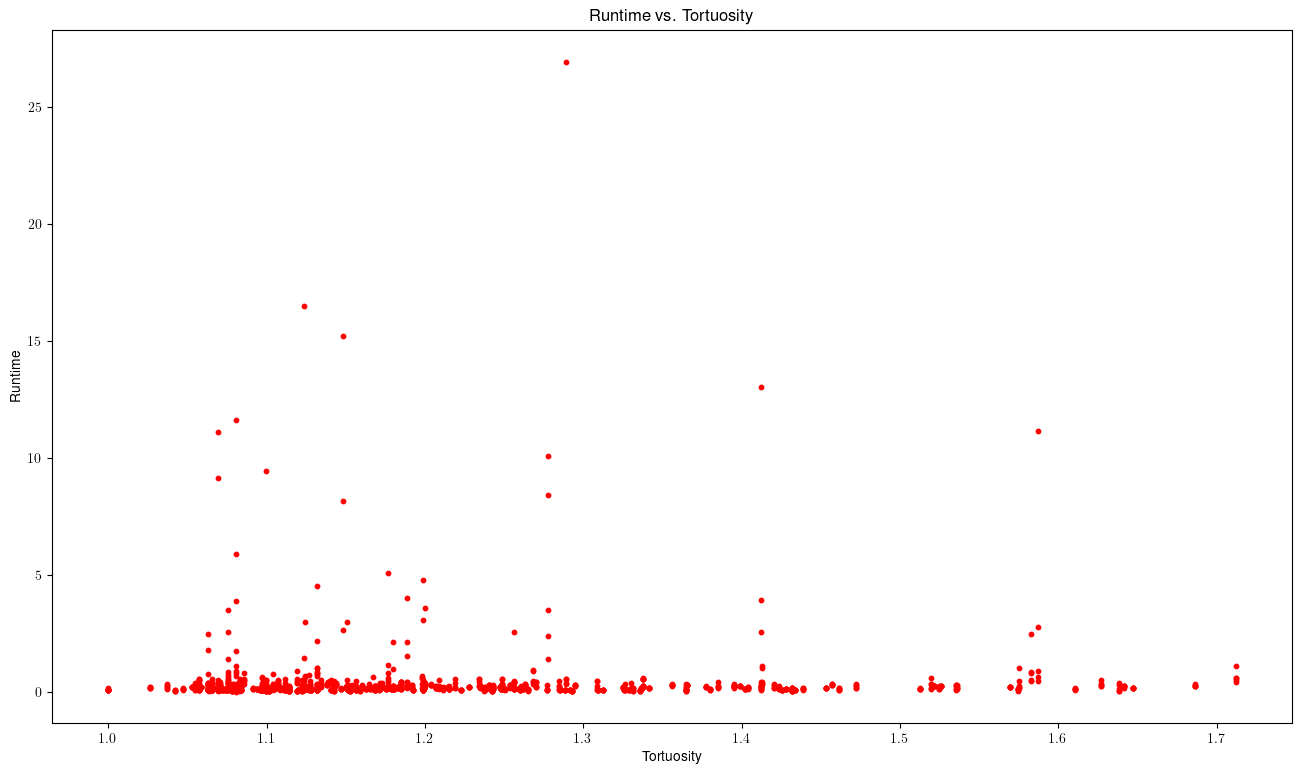

In [48]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['plan_time'] + metadata_cmp['verif_time'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Runtime')
plt.show()

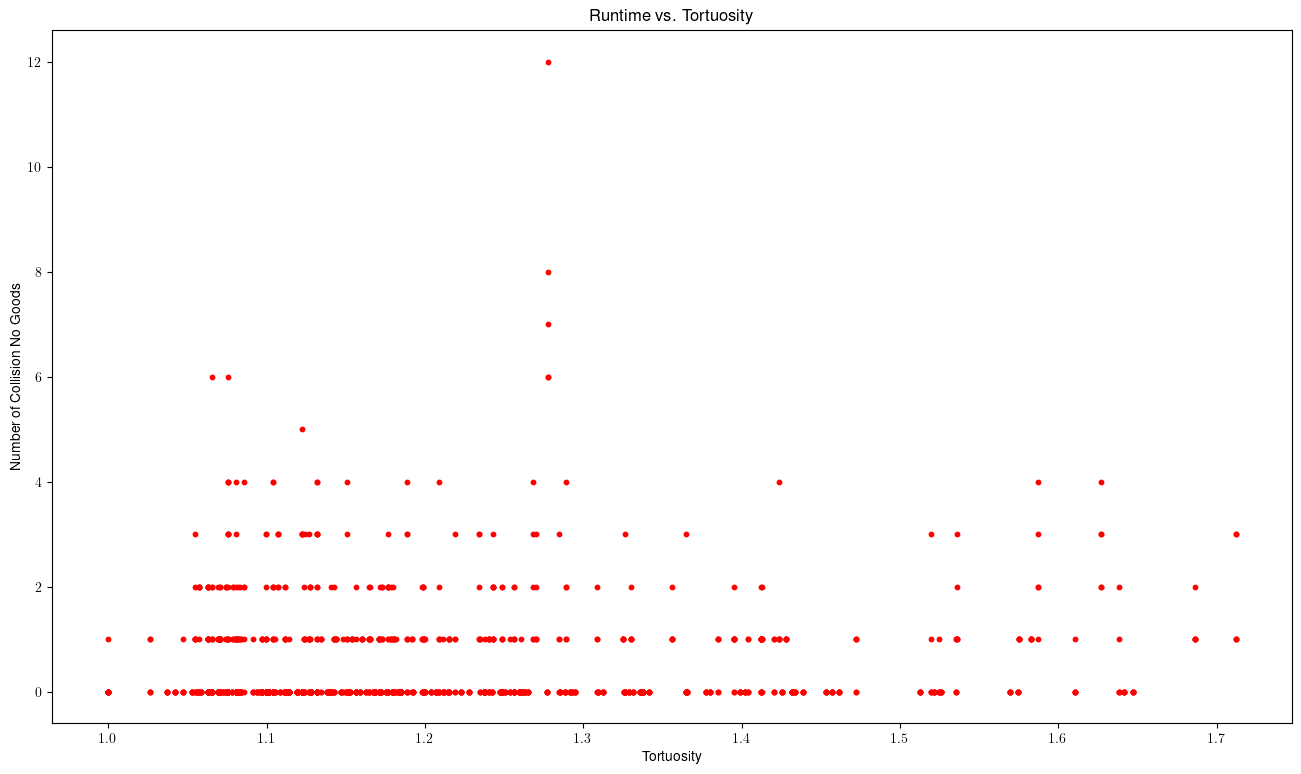

In [49]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()

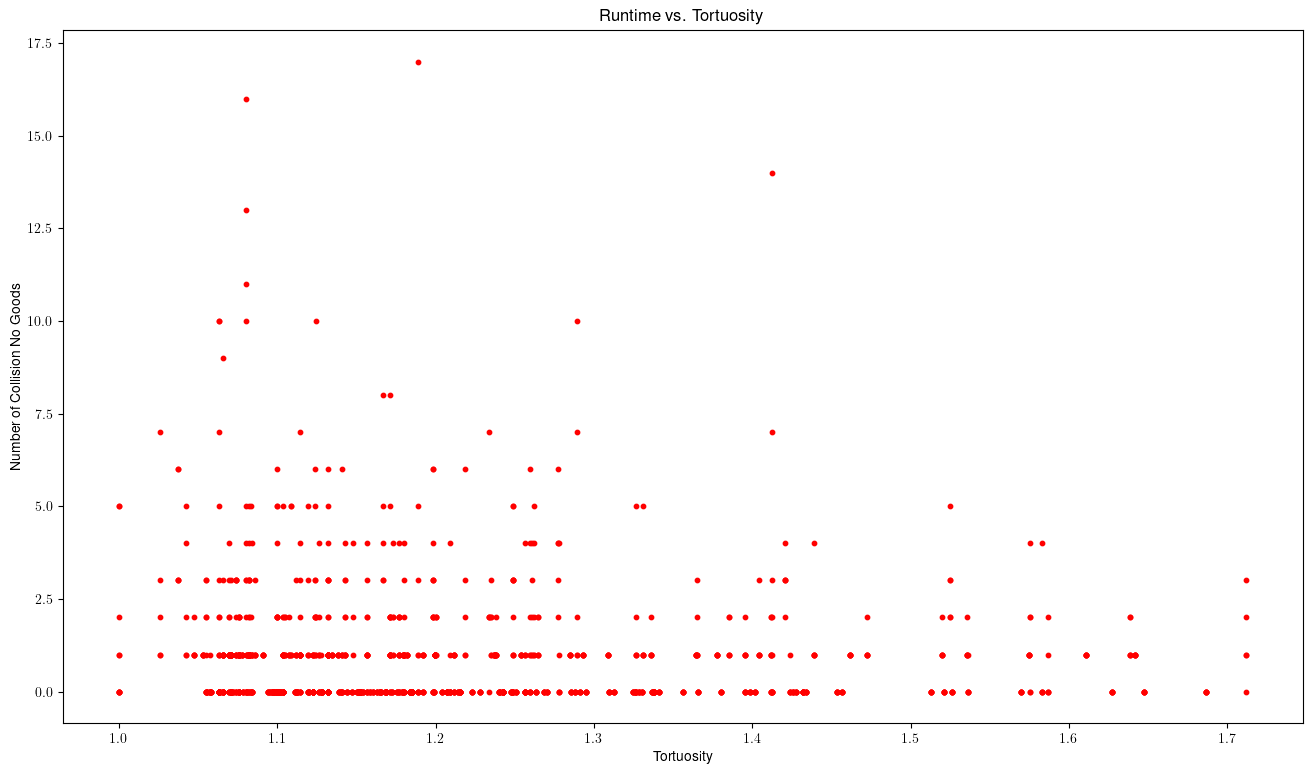

In [50]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_cusp_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()